#Question
#1.Take any two 3X3 matrices and find the eigen values and eigen vectors using python
#2.Take any two 2X2 matrix and find the eigen values and eigen vectors and visualize it using python

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sympy as sy
sy.init_printing()
plt.style.use('ggplot')

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# <font face="gotham" color="purple"> Eigenvalue and Eigenvector

An  _eigenvector_ of an $n \times n$ matrix $A$ is a nonzero vector $x$ such that $Ax = \lambda x$ for some scalar $\lambda$. A scalar $\lambda$ is called an _eigenvalue_ of $A$ if there is a nontrivial solution $x$ of $Ax = \lambda x$, such an $x$ is called an eigenvector corresponding to $\lambda$.

Rewrite the equation,

$$
(A-\lambda I)x = 0
$$

Since the eigenvector should be a nonzero vector, which means:

1. The column or rows of $(A-\lambda I)$ are linearly dependent
2. $(A-\lambda I)$ is not full rank, $Rank(A)<n$.
3. $(A-\lambda I)$ is not invertible.
4. $\text{det}(A-\lambda I)=0$, which is called _characteristic equation_.

Consider a matrix $A$

$$
A = \begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 1 \\
2 & -2 & 3
\end{bmatrix}
$$

Set up the characteristic equation,

$$
\text{det}\left(
\begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 1 \\
2 & -2 & 3
\end{bmatrix}
-
\lambda
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\right) = 0
$$

Use SymPy ```charpoly``` and ```factor```, we can have straightforward solutions for eigenvalues.

In [3]:
lamda = sy.symbols('lamda') # 'lamda' withtout 'b' is reserved for SymPy, lambda is reserved for Python

```charpoly``` returns characteristic equation.

In [4]:
A = sy.Matrix([[1, 0, 0], [1, 0, 1], [2, -2, 3]])
p = A.charpoly(lamda); p

PurePoly(lamda**3 - 4*lamda**2 + 5*lamda - 2, lamda, domain='ZZ')

Factor the polynomial such that we can see the solution.

In [5]:
sy.factor(p)

PurePoly(lamda**3 - 4*lamda**2 + 5*lamda - 2, lamda, domain='ZZ')

From the factored characteristic polynomial, we get the eigenvalue, and $\lambda =1$ has algebraic multiplicity of $2$, because there are two $(\lambda-1)$. If not factored, we can use ```solve``` instead.

In [6]:
sy.solve(p,lamda)

[1, 2]

Or use ```eigenvals``` directly.

In [7]:
A.eigenvals()

{1: 2, 2: 1}

To find the eigenvector corresponding to $\lambda$, we substitute the eigenvalues back into $(A-\lambda I)x=0$ and solve it. Construct augmented matrix with $\lambda =1$ and perform rref.

In [8]:
(A - 1*sy.eye(3)).row_join(sy.zeros(3,1)).rref()

⎛⎡1  -1  1  0⎤      ⎞
⎜⎢           ⎥      ⎟
⎜⎢0  0   0  0⎥, (0,)⎟
⎜⎢           ⎥      ⎟
⎝⎣0  0   0  0⎦      ⎠

The null space is the solution set of the linear system.

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
x_2-x_3 \\ x_2 \\ x_3
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
1 \\ 1 \\ 0
\end{matrix}
\right]
+x_3\left[
\begin{matrix}
-1 \\ 0 \\ 1
\end{matrix}
\right]
$$

This is called _eigenspace_ for $\lambda = 1$, which is a subspace in $\mathbb{R}^3$. All eigenvectors are inside the eigenspace.

We can proceed with $\lambda = 2$ as well.

In [9]:
(A - 2*sy.eye(3)).row_join(sy.zeros(3,1)).rref()

⎛⎡1  0   0    0⎤        ⎞
⎜⎢             ⎥        ⎟
⎜⎢0  1  -1/2  0⎥, (0, 1)⎟
⎜⎢             ⎥        ⎟
⎝⎣0  0   0    0⎦        ⎠

The null space is the solution set of the linear system.

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
0\\ \frac{1}{2}x_3\\ x_3
\end{matrix}
\right]=
x_3\left[
\begin{matrix}
0 \\ \frac{1}{2} \\ 1
\end{matrix}
\right]
$$

To avoid troubles of solving back and forth, SymPy has ```eigenvects``` to calcuate eigenvalues and eigenspaces (basis of eigenspace).

In [10]:
eig = A.eigenvects(); eig

⎡⎛      ⎡⎡1⎤  ⎡-1⎤⎤⎞  ⎛      ⎡⎡ 0 ⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢   ⎥⎥⎟⎥
⎢⎜1, 2, ⎢⎢1⎥, ⎢0 ⎥⎥⎟, ⎜2, 1, ⎢⎢1/2⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢   ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠  ⎝      ⎣⎣ 1 ⎦⎦⎠⎦

To clarify what we just get, write

In [11]:
print('Eigenvalue = {0}, Multiplicity = {1}, Eigenspace = {2}'.format(eig[0][0], eig[0][1], eig[0][2]))

Eigenvalue = 1, Multiplicity = 2, Eigenspace = [Matrix([
[1],
[1],
[0]]), Matrix([
[-1],
[ 0],
[ 1]])]


In [12]:
print('Eigenvalue = {0}, Multiplicity = {1}, Eigenspace = {2}'.format(eig[1][0], eig[1][1], eig[1][2]))

Eigenvalue = 2, Multiplicity = 1, Eigenspace = [Matrix([
[  0],
[1/2],
[  1]])]


## <font face="gotham" color="purple"> NumPy Functions for Eigenvalues and Eigenspace

Convert SymPy matrix into NumPy float array.

In [13]:
A = np.array(A).astype(float); A

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 2., -2.,  3.]])

```.eigvals()``` and ```.eig(A)``` are handy functions for eigenvalues and eigenvectors.

In [14]:
np.linalg.eigvals(A)

array([2., 1., 1.])

In [15]:
np.linalg.eig(A) #return both eigenvalues and eigenvectors

EigResult(eigenvalues=array([2., 1., 1.]), eigenvectors=array([[ 0.   ,  0.   ,  0.408],
       [ 0.447,  0.707, -0.408],
       [ 0.894,  0.707, -0.816]]))

## <font face="gotham" color="purple"> An Example

Consider a matrix $A$

In [16]:
A = sy.Matrix([[-4, -4, 20, -8, -1],
               [14, 12, 46, 18, 2],
               [6, 4, -18, 8, 1],
               [11, 7, -37, 17, 2],
               [18, 12, -60, 24, 5]])
A

⎡-4  -4  20   -8  -1⎤
⎢                   ⎥
⎢14  12  46   18  2 ⎥
⎢                   ⎥
⎢6   4   -18  8   1 ⎥
⎢                   ⎥
⎢11  7   -37  17  2 ⎥
⎢                   ⎥
⎣18  12  -60  24  5 ⎦

Find eigenvalues.

In [17]:
eig = A.eigenvals()
eig

⎧            5   √1473     5   √1473   ⎫
⎨2: 2, 3: 1, ─ - ─────: 1, ─ + ─────: 1⎬
⎩            2     2       2     2     ⎭

Or use NumPy functions, show the eigenvalues.

In [18]:
A = np.array(A)
A = A.astype(float)
eigval, eigvec = np.linalg.eig(A)
eigval

array([ 21.69, -16.69,   3.  ,   2.  ,   2.  ])

And corresponding eigenvectors.

In [19]:
eigvec

array([[-0.124, -0.224,  0.   , -0.039,  0.611],
       [ 0.886, -0.543, -0.894, -0.216, -0.149],
       [ 0.124,  0.224,  0.   ,  0.   , -0.   ],
       [ 0.216,  0.392,  0.447,  0.255, -0.462],
       [ 0.371,  0.672, -0.   , -0.942,  0.625]])

## <font face="gotham" color="purple"> A Visualization Example

Let

$$
A=
\left[
\begin{matrix}
1 & 6\\
5 & 2
\end{matrix}
\right]
$$

find the eigenvalues and vectors, then visualize in $\mathbb{R}^2$

Use characteristic equation $|A - \lambda I|=0$

$$
\left|
\left[
\begin{matrix}
1 & 6\\
5 & 2
\end{matrix}
\right]
-
\left[
\begin{matrix}
\lambda & 0\\
0 & \lambda
\end{matrix}
\right]\right|=0
$$

In [20]:
lamda = sy.symbols('lamda')
A = sy.Matrix([[1,6],[5,2]])
I = sy.eye(2)

In [21]:
A - lamda*I

⎡1 - λ    6  ⎤
⎢            ⎥
⎣  5    2 - λ⎦

In [22]:
p = A.charpoly(lamda);p

PurePoly(lamda**2 - 3*lamda - 28, lamda, domain='ZZ')

In [23]:
sy.factor(p)

PurePoly(lamda**2 - 3*lamda - 28, lamda, domain='ZZ')

There are two eigenvalues: $7$ and $4$. Next we calculate eigenvectors.

In [24]:
(A - 7*sy.eye(2)).row_join(sy.zeros(2,1)).rref()

⎛⎡1  -1  0⎤      ⎞
⎜⎢        ⎥, (0,)⎟
⎝⎣0  0   0⎦      ⎠

The eigenspace for $\lambda = 7$ is

$$
\left[
\begin{matrix}
x_1\\
x_2
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
1\\
1
\end{matrix}
\right]
$$

Any vector is eigenspace as long as $x \neq 0$ is an eigenvector. Let's find out eigenspace for $\lambda = 4$.

In [25]:
(A + 4*sy.eye(2)).row_join(sy.zeros(2,1)).rref()

⎛⎡1  6/5  0⎤      ⎞
⎜⎢         ⎥, (0,)⎟
⎝⎣0   0   0⎦      ⎠

The eigenspace for $\lambda = -4$ is

$$
\left[
\begin{matrix}
x_1\\
x_2
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
-\frac{6}{5}\\
1
\end{matrix}
\right]
$$

Let's plot both eigenvectors as $(1, 1)$ and $(-6/5, 1)$ and multiples with eigenvalues.

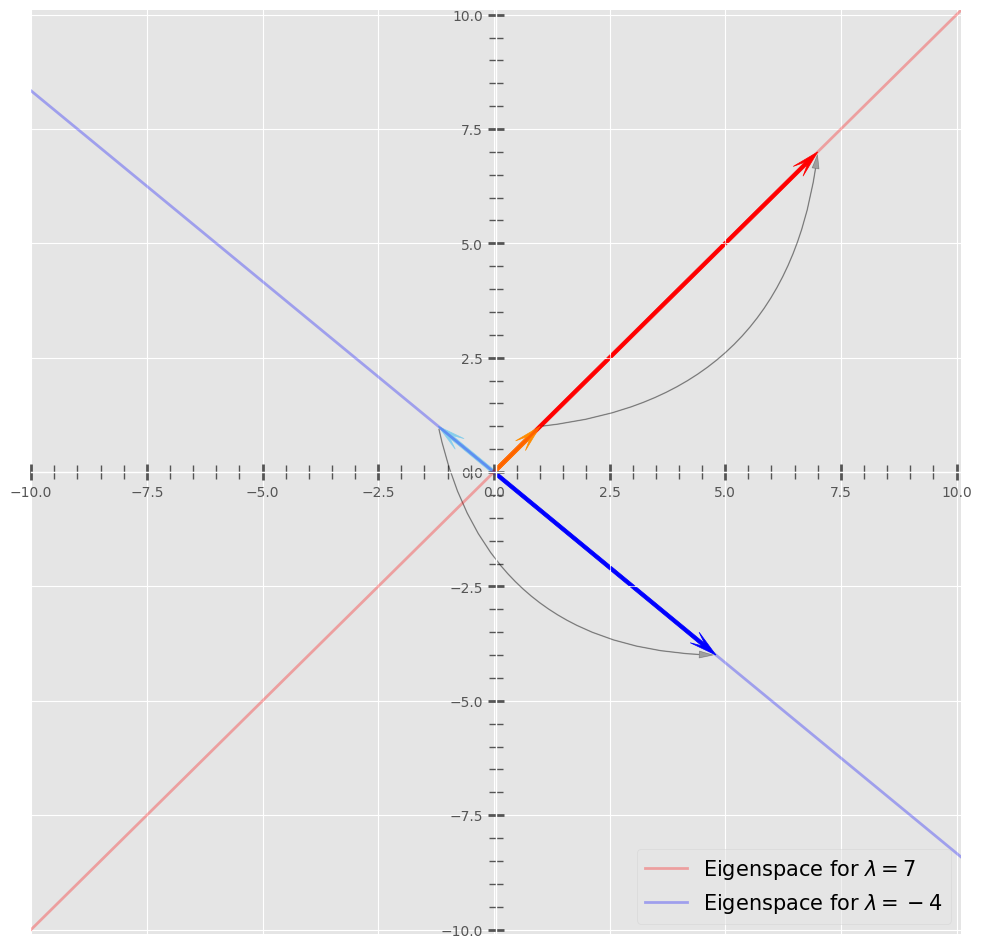

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12, 12))
arrows = np.array([ [[0, 0, 1, 1]],
                    [[0, 0, -6/5, 1]],
                    [[0, 0, 7, 7]],
                    [[0, 0, 24/5, -4]] ])
colors = ['darkorange', 'skyblue', 'r', 'b']

for i in range(arrows.shape[0]):
    X, Y, U, V = zip(*arrows[i, :, :])
    ax.arrow(X[0], Y[0], U[0], V[0], color=colors[i], width=0.08,
             length_includes_head=True, head_width=0.3, head_length=0.6,
             overhang=0.4, zorder=-i)

# Eigenspace for λ = 7
x = np.arange(-10, 10.6, 0.5)
y = x
ax.plot(x, y, lw=2, color='red', alpha=0.3, label=r'Eigenspace for $\lambda = 7$')

# Eigenspace for λ = -4
x = np.arange(-10, 10.6, 0.5)
y = -5/6 * x
ax.plot(x, y, lw=2, color='blue', alpha=0.3, label=r'Eigenspace for $\lambda = -4$')

# Annotation Arrows
style = "Simple, tail_width=0.5, head_width=5, head_length=10"
kw = dict(arrowstyle=style, color="k")

a = mpl.patches.FancyArrowPatch((1, 1), (7, 7), connectionstyle="arc3,rad=.4", **kw, alpha=0.3)
plt.gca().add_patch(a)

a = mpl.patches.FancyArrowPatch((-6/5, 1), (24/5, -4), connectionstyle="arc3,rad=.4", **kw, alpha=0.3)
plt.gca().add_patch(a)

# Legend
leg = ax.legend(fontsize=15, loc='lower right')
leg.get_frame().set_alpha(0.5)

# Axis, Spines, Ticks
ax.axis([-10, 10.1, -10.1, 10.1])
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis='both', direction='inout', length=12, width=2, which='major')
ax.tick_params(axis='both', direction='inout', length=10, width=1, which='minor')
plt.show()
